In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r  = np.sqrt( x**2 + y**2 )
    az=np.degrees( np.arctan2(x, y) )
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az

def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    x = r * np.sin(np.radians(az))
    y = r * np.cos(np.radians(az))
    return x, y

def UTM2Island(eutm, nutm, eoff=378489.45785127, noff=3855740.50113774, rot=42.):
    """
    Convert UTM NAD83 Zone 18N easting, northing to N. Core Banks alongshore, cross-shore coordinates
    xisl, yisl = UTM2Island( eutm, nutm )
    """
    [r,az]=pcoord(eutm-eoff,nutm-noff)
    az = az+rot;
    [xisl,yisl]=xycoord(r,az)
    return xisl, yisl

Type 4 and 5 are the Lagoonal depocenter and barrier depocenter respectively (they are in Class 0). Then Type 1 is Tapering, 2 is Lobate, and 3 is Apron

In [12]:
# File of area stats from Jin-Si, Jan 4 2021, sorted by Centroid, with extra columns removed
df = pd.read_csv("NCB_Channel_Stats_n25_pD_sorted.csv")
# remove the shredded region, where Jin-Si put 1's in width, length, etc.
df = df.drop(df[df.Width <= 1].index).copy()
df2=df.describe()
df2

,OBJECTID,Shape_Area,MIN,MAX,RANGE,MEAN,STD,VOLUME,CENTROID_X,CENTROID_Y,Width,Length,Throat,Class,Type,New_Veg_Area
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,67.011111,13014.705889,-0.148343,3.329595,3.477938,1.021762,0.582328,16008.174917,391380.751268,3.868430e+06,143.279444,136.543444,64.952222,0.933333,1.833333,1112.457111
std,33.354243,17245.544771,0.273975,1.447468,1.585164,0.347742,0.213756,22054.106281,5421.369168,5.048094e+03,122.871401,85.652689,71.342482,0.250841,0.974391,2810.611227
min,9.000000,46.000000,-1.326000,0.612000,0.440000,0.301134,0.089796,26.074226,380367.790800,3.858401e+06,6.780000,10.700000,6.780000,0.000000,1.000000,0.010000
25%,38.500000,1268.250000,-0.185750,2.324160,2.381397,0.780301,0.461295,967.021415,386238.643625,3.863441e+06,37.775000,74.225000,20.550000,1.000000,1.000000,0.010000
50%,73.500000,6836.500000,-0.075500,3.144085,3.517253,1.054508,0.591568,7011.045128,391991.870150,3.869091e+06,107.350000,126.500000,46.200000,1.000000,2.000000,0.010000
75%,95.750000,17415.750000,-0.006250,4.582399,4.789140,1.298895,0.759976,22813.610552,395555.604950,3.872319e+06,229.625000,179.020000,69.075000,1.000000,2.000000,575.330000
max,121.000000,88843.000000,0.187000,6.367895,7.250895,1.620925,0.962666,109310.830600,400487.308200,3.876745e+06,600.000000,416.000000,446.000000,1.000000,5.000000,12620.240000


Type 4 and 5 are the Lagoonal depocenter and barrier depocenter respectively (they are in Class 0). Then Type 1 is Tapering, 2 is Lobate, and 3 is Apron

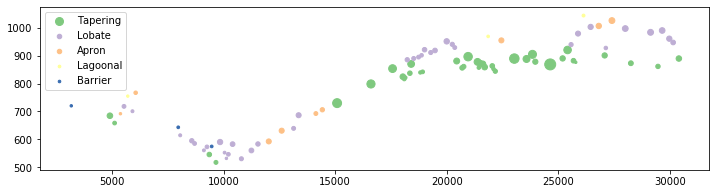

In [55]:
tapering = df.loc[df['Type'] == 1]['Shape_Area'].values
lobate = df.loc[df['Type'] == 2]['Shape_Area'].values
apron = df.loc[df['Type'] == 3]['Shape_Area'].values
lagoonal = df.loc[df['Type'] == 4]['Shape_Area'].values
barrier = df.loc[df['Type'] == 5]['Shape_Area'].values

x1,y1 = UTM2Island(df.loc[df['Type'] == 1]['CENTROID_X'].values, df.loc[df['Type'] == 1]['CENTROID_Y'].values )
x2,y2 = UTM2Island(df.loc[df['Type'] == 2]['CENTROID_X'].values, df.loc[df['Type'] == 2]['CENTROID_Y'].values )
x3,y3 = UTM2Island(df.loc[df['Type'] == 3]['CENTROID_X'].values, df.loc[df['Type'] == 3]['CENTROID_Y'].values )
x4,y4 = UTM2Island(df.loc[df['Type'] == 4]['CENTROID_X'].values, df.loc[df['Type'] == 4]['CENTROID_Y'].values )
x5,y5 = UTM2Island(df.loc[df['Type'] == 5]['CENTROID_X'].values, df.loc[df['Type'] == 5]['CENTROID_Y'].values )

cols=['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0']

# scale by area
ascaled = lambda a: 6.*np.sqrt(a)/(np.min(np.sqrt(a)))

plt.figure(figsize=(12,3))
plt.scatter(x1,y1,s=ascaled(tapering),c=cols[0],label='Tapering')
plt.scatter(x2,y2,s=ascaled(lobate),c=cols[1],label='Lobate')
plt.scatter(x3,y3,s=ascaled(apron),c=cols[2],label='Apron')
plt.scatter(x4,y4,s=ascaled(lagoonal),c=cols[3],label='Lagoonal')
plt.scatter(x5,y5,s=ascaled(barrier),c=cols[4],label='Barrier')
plt.legend()

In [54]:
lagoonal

array([31062., 42590., 64229.])

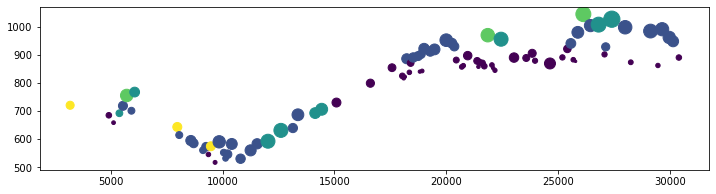

In [44]:
xisl,yisl = UTM2Island(df['CENTROID_X'].values, df['CENTROID_Y'])
c=df['Class'].values
t=df['Type'].values
a=df['Shape_Area'].values
asl = 6.*np.sqrt(a)/(np.min(np.sqrt(a)))

plt.figure(figsize=(12,3))
plt.scatter(xisl,yisl,s=asl,c=t)

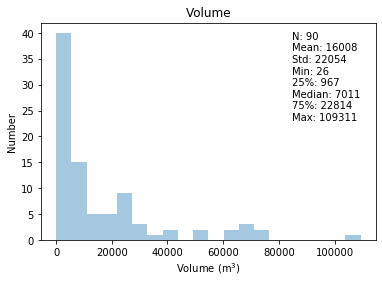

In [3]:
#TODO: With a little work, these could all be plotted on same figure
colname = 'VOLUME'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Volume')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Volume (m$^3$)')
plt.savefig('Hist_volume.svg',dpi=200,bbox='tight')

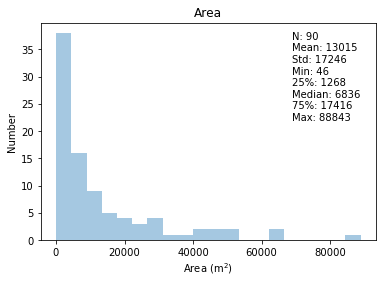

In [4]:
colname = 'Shape_Area'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Area')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Area (m$^2$)')
plt.savefig('Hist_area.svg',dpi=200,bbox='tight')

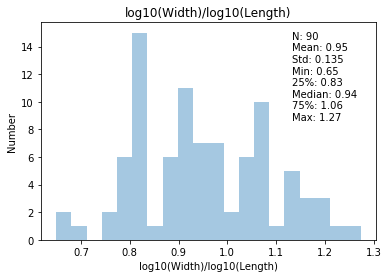

In [5]:

data = np.log10(df['Width'].values)/np.log10(df['Length'])
count = np.shape(data)[0]
mean = np.mean(data)
std = np.std(data)
pct = np.nanpercentile(data,[25,50,75])
mind = np.min(data)
maxd = np.max(data)

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('log10(Width)/log10(Length)')
ts = "N: {:.0f}\nMean: {:.2f}\nStd: {:.3f}\nMin: {:.2f}\n25%: {:.2f}\nMedian: {:.2f}\n75%: {:.2f}\nMax: {:.2f}".format(\
    count,mean,std,\
    mind,pct[0],pct[1],pct[2],maxd)
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('log10(Width)/log10(Length)')
plt.savefig('Hist_width_length.svg',dpi=200,bbox='tight')

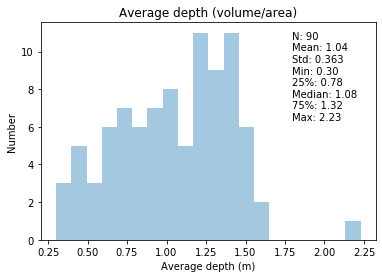

In [6]:
data = df['VOLUME'].values/df['Shape_Area']
count = np.shape(data)[0]
mean = np.mean(data)
std = np.std(data)
pct = np.percentile(data,[25,50,75])
mind = np.min(data)
maxd = np.max(data)

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Average depth (volume/area)')
ts = "N: {:.0f}\nMean: {:.2f}\nStd: {:.3f}\nMin: {:.2f}\n25%: {:.2f}\nMedian: {:.2f}\n75%: {:.2f}\nMax: {:.2f}".format(\
    count,mean,std,\
    mind,pct[0],pct[1],pct[2],maxd)
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Average depth (m)')
plt.savefig('Hist_avg_depth.svg',dpi=200,bbox='tight')

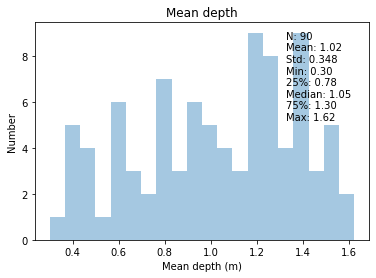

In [7]:
colname = 'MEAN'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Mean depth')
ts = "N: {:.0f}\nMean: {:.2f}\nStd: {:.3f}\nMin: {:.2f}\n25%: {:.2f}\nMedian: {:.2f}\n75%: {:.2f}\nMax: {:.2f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Mean depth (m)')
plt.savefig('Hist_mean_depth.svg',dpi=200,bbox='tight')

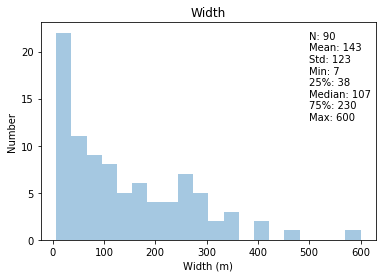

In [8]:
colname = 'Width'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Width')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Width (m)')
plt.savefig('Hist_width.svg',dpi=200,bbox='tight')

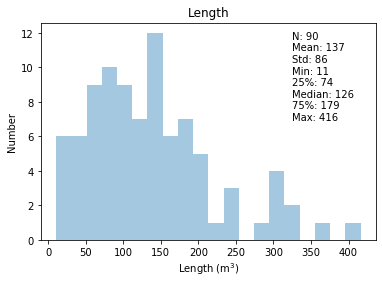

In [9]:
colname = 'Length'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Length')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Length (m$^3$)')
plt.savefig('Hist_length.svg',dpi=200,bbox='tight')

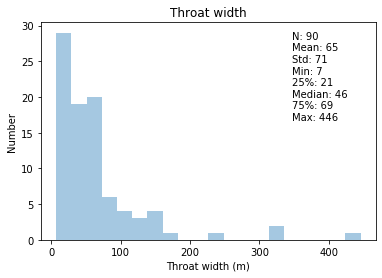

In [10]:
colname = 'Throat'
data = df[colname].values

fig, ax1 = plt.subplots(ncols=1)
_ = ax1.hist(data, bins=20, histtype='stepfilled', alpha=0.4)
plt.title('Throat width')
ts = "N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    df2[colname]['count'],df2[colname]['mean'],df2[colname]['std'],\
    df2[colname]['min'],df2[colname]['25%'],df2[colname]['50%'],df2[colname]['75%'],df2[colname]['max'])
ax1.text(x=.75, y=.55, s=ts, fontsize=10, transform=ax1.transAxes)
plt.ylabel('Number')
plt.xlabel('Throat width (m)')
plt.savefig('Hist_throat.svg',dpi=200,bbox='tight')

In [ ]:
def UTM2Island(eutm, nutm, eoff=378489.45785127, noff=3855740.50113774, rot=42.):
    """
    Convert UTM NAD83 Zone 18N easting, northing to N. Core Banks alongshore, cross-shore coordinates
    xisl, yisl = UTM2Island( eutm, nutm )
    """
    [r,az]=pcoord(eutm-eoff,nutm-noff)
    az = az+rot;
    [xisl,yisl]=xycoord(r,az)
    return xisl, yisl